# Seaborn Tutorial

Seaborn is a high level interface to **matplotlib**.

In [3]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [4]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [13]:
df = pd.read_csv("pokemon.csv", index_col=0)
df.head()
df.info()

Name  Type1   Type2  Total  HP  Attack  Defense  Sp.Atk  Sp.Def  \
#                                                                          
1   Bulbasaur  Grass  Poison    318  45      49       49      65      65   
2     Ivysaur  Grass  Poison    405  60      62       63      80      80   
3    Venusaur  Grass  Poison    525  80      82       83     100     100   
4  Charmander   Fire     NaN    309  39      52       43      60      50   
5  Charmeleon   Fire     NaN    405  58      64       58      80      65   

   Speed  Stage  Legendary  
#                           
1     45      1      False  
2     60      2      False  
3     80      3      False  
4     65      1      False  
5     80      2      False

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 1 to 151
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       151 non-null    object
 1   Type1      151 non-null    object
 2   Type2      67 non-null     object
 3   Total      151 non-null    int64 
 4   HP         151 non-null    int64 
 5   Attack     151 non-null    int64 
 6   Defense    151 non-null    int64 
 7   Sp.Atk     151 non-null    int64 
 8   Sp.Def     151 non-null    int64 
 9   Speed      151 non-null    int64 
 10  Stage      151 non-null    int64 
 11  Legendary  151 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 14.3+ KB


## Point Plot

<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='Attack', ylabel='Defense'>

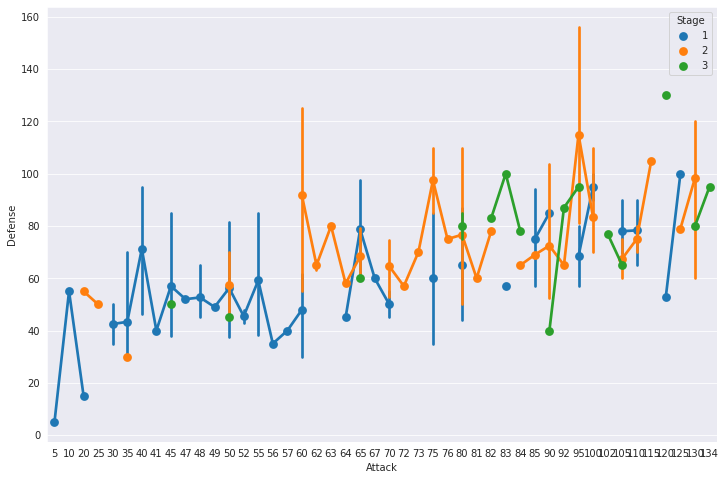

In [93]:
plt.figure(figsize=(12, 8))
sns.pointplot(x="Attack", y="Defense", data=df, hue="Stage")

## Scatter plot

In [23]:
# passing the dataframe to the seaborn plot func is often recommended
# using hue, we can visualize the third dimension using colors
sns.lmplot(x="Attack", y="Defense", data=df, fit_reg=False, hue="Stage")

# For setting x and y limits we need to access matplotlib functions
plt.grid()
plt.xlim(0, None)
plt.ylim(0, None)

(0.0, 140.45)

(0.0, 188.75)

<AxesSubplot:xlabel='Attack', ylabel='Defense'>

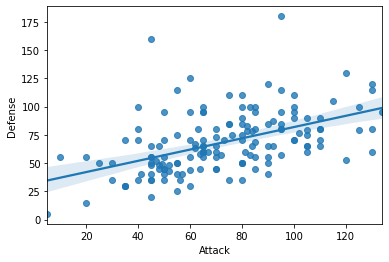

In [17]:
# passing the dataframe to the seaborn plot func is often recommended
sns.regplot(x="Attack", y="Defense", data=df)

## Boxplot

[BoxPlot reference](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

<AxesSubplot:>

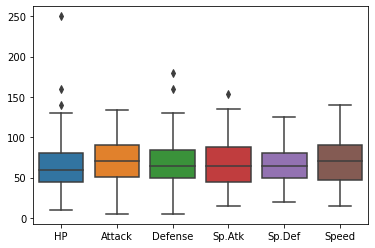

In [25]:
# remove categorical columns and other irrelevant columns for a boxplot
sns.boxplot(data=df.drop(columns=["Total", "Stage", "Legendary"]))

<AxesSubplot:xlabel='Stage', ylabel='Attack'>

<AxesSubplot:xlabel='Stage', ylabel='Attack'>

<AxesSubplot:xlabel='Stage', ylabel='Attack'>

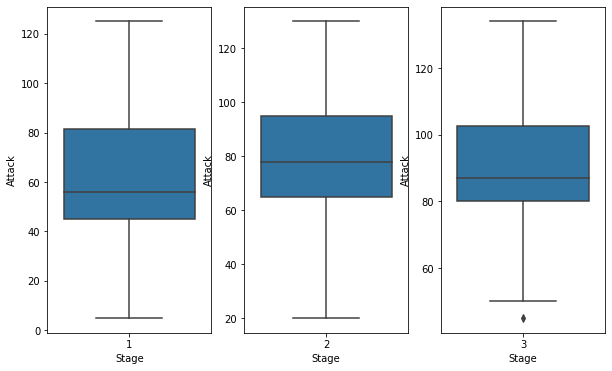

In [45]:
stage1_pokemons_attack = df.loc[df.Stage == 1].loc[:, ["Stage", "Attack"]]
stage2_pokemons_attack = df.loc[df.Stage == 2].loc[:, ["Stage", "Attack"]]
stage3_pokemons_attack = df.loc[df.Stage == 3].loc[:, ["Stage", "Attack"]]

# len(stage1_pokemons_attack), len(stage2_pokemons_attack), len(stage3_pokemons_attack)
fig, ax = plt.subplots(1, 3, figsize=(10, 6))

sns.boxplot(x="Stage", y="Attack", data=stage1_pokemons_attack, ax=ax[0])
sns.boxplot(x="Stage", y="Attack", data=stage2_pokemons_attack, ax=ax[1])
sns.boxplot(x="Stage", y="Attack", data=stage3_pokemons_attack, ax=ax[2])

# Using matplotlib
# plt.boxplot([stage1_pokemons_attack, stage2_pokemons_attack, stage3_pokemons_attack],
#            labels=["stage1", "stage2", "stage3"])

## Violinplots in seaborn

These plots are alternative to boxplots.

[Reference](https://towardsdatascience.com/violin-plots-explained-fb1d115e023d)

<AxesSubplot:xlabel='Type1', ylabel='Attack'>

<AxesSubplot:xlabel='Type1', ylabel='Attack'>

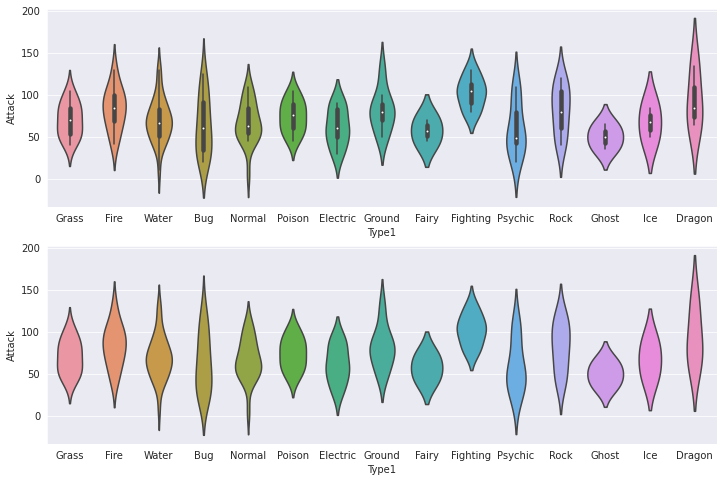

In [56]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
sns.violinplot(x="Type1", y="Attack", data=df, ax=ax[0])
# Dragans have better attack and also a large variance

# To remove the line inside the plot set inner=None
sns.violinplot(x="Type1", y="Attack", data=df, ax=ax[1], inner=None)

## Swarm plots

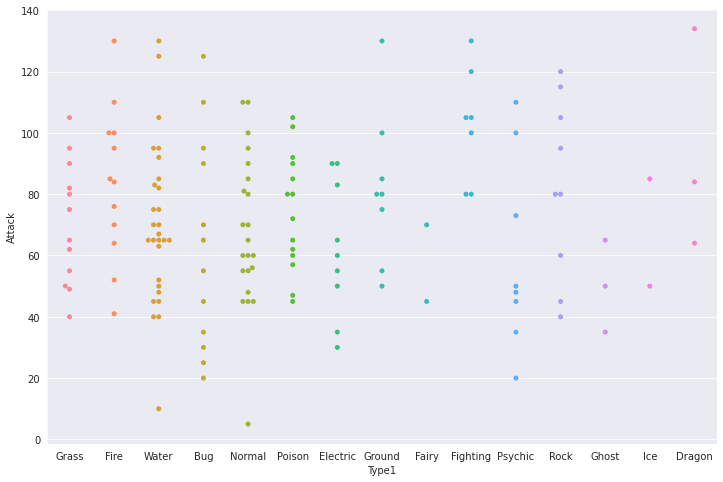

In [52]:
plt.figure(figsize=(12, 8))
# For smaller datasets swarm plots work well.
sns.swarmplot(x="Type1", y="Attack", data=df);

Name  Type1   Type2 Stat  StatValues
0   Bulbasaur  Grass  Poison   HP          45
1     Ivysaur  Grass  Poison   HP          60
2    Venusaur  Grass  Poison   HP          80
3  Charmander   Fire     NaN   HP          39
4  Charmeleon   Fire     NaN   HP          58

<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='Stat', ylabel='StatValues'>

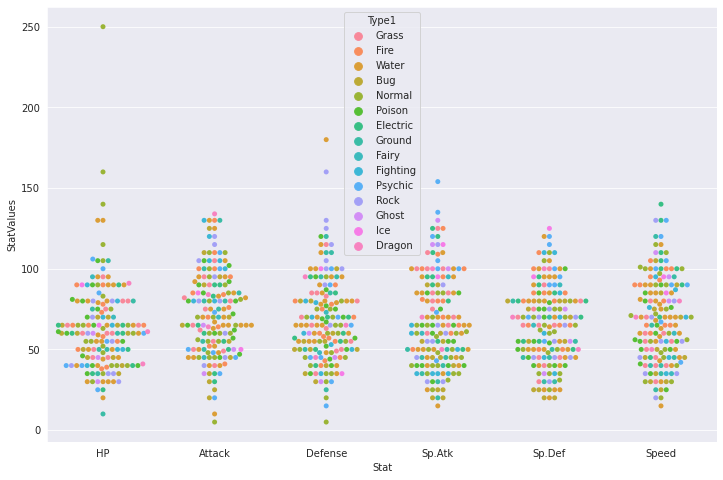

In [54]:
# pandas melt operation on a dataframe combines columns to single columne
pokemons_df = df.drop(columns=["Total", "Stage", "Legendary"]).melt(
    id_vars=["Name", "Type1", "Type2"], var_name="Stat", value_name="StatValues"
)

pokemons_df.head()

plt.figure(figsize=(12, 8))
sns.swarmplot(x="Stat", y="StatValues", data=pokemons_df, hue="Type1")

## Heatmap using seaborn

<AxesSubplot:>

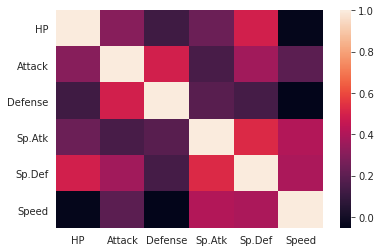

In [57]:
pokemon_stats_df = df.drop(columns=["Total", "Stage", "Legendary"])
sns.heatmap(data=pokemon_stats_df.corr())

## Histogram

<AxesSubplot:xlabel='Attack', ylabel='Count'>

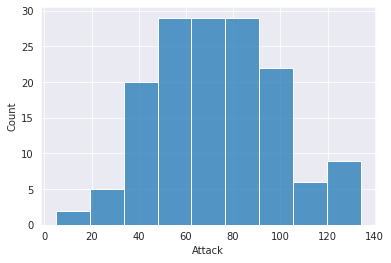

In [59]:
sns.histplot(df.Attack)

## Bar plot

<AxesSubplot:xlabel='Type1', ylabel='count'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Grass'),
  Text(1, 0, 'Fire'),
  Text(2, 0, 'Water'),
  Text(3, 0, 'Bug'),
  Text(4, 0, 'Normal'),
  Text(5, 0, 'Poison'),
  Text(6, 0, 'Electric'),
  Text(7, 0, 'Ground'),
  Text(8, 0, 'Fairy'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Psychic'),
  Text(11, 0, 'Rock'),
  Text(12, 0, 'Ghost'),
  Text(13, 0, 'Ice'),
  Text(14, 0, 'Dragon')])

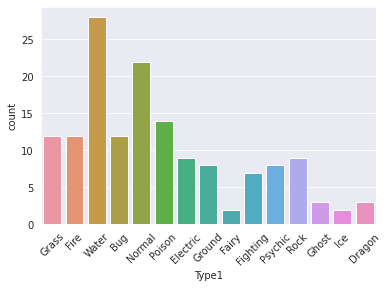

In [77]:
# Given a categorical column, countplot automatically counts and plots
sns.countplot(x="Type1", data=df)
plt.xticks(rotation=45)

<AxesSubplot:xlabel='Type1', ylabel='Count'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Bug'),
  Text(1, 0, 'Dragon'),
  Text(2, 0, 'Electric'),
  Text(3, 0, 'Fairy'),
  Text(4, 0, 'Fighting'),
  Text(5, 0, 'Fire'),
  Text(6, 0, 'Ghost'),
  Text(7, 0, 'Grass'),
  Text(8, 0, 'Ground'),
  Text(9, 0, 'Ice'),
  Text(10, 0, 'Normal'),
  Text(11, 0, 'Poison'),
  Text(12, 0, 'Psychic'),
  Text(13, 0, 'Rock'),
  Text(14, 0, 'Water')])

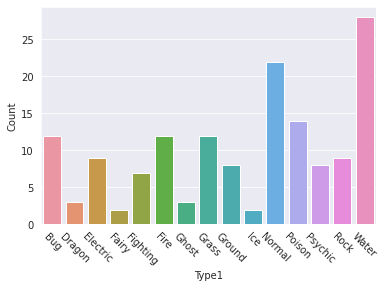

In [78]:
type1_pokemons_df = df.groupby("Type1", as_index=False)["Name"].count()
type1_pokemons_df.columns.values[1] = "Count"
sns.barplot(x="Type1", y="Count", data=type1_pokemons_df)
plt.xticks(rotation=-45)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Type1    15 non-null     object 
 1   HP       15 non-null     float64
 2   Attack   15 non-null     float64
 3   Defense  15 non-null     float64
dtypes: float64(3), object(1)
memory usage: 600.0+ bytes


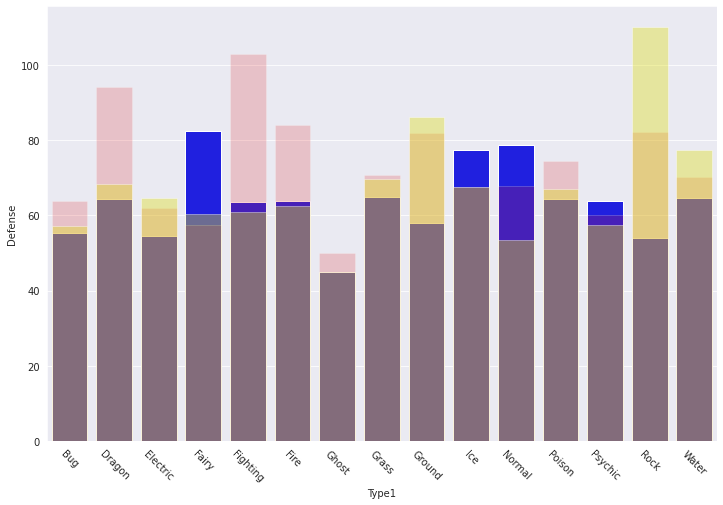

In [115]:
type1_pokemon_powers_df = df.groupby("Type1", as_index=False)[["HP", "Attack", "Defense"]].mean()

type1_pokemon_powers_df.info()
plt.figure(figsize=(12, 8))
sns.barplot(x="Type1", y="HP", color="blue", data=type1_pokemon_powers_df)
sns.barplot(x="Type1", y="Attack", color="red", alpha=0.2, data=type1_pokemon_powers_df)
sns.barplot(x="Type1", y="Defense", color="yellow", alpha=0.4, data=type1_pokemon_powers_df)
plt.xticks(rotation=-45);

## Factor plot/Categorical Plot

In [82]:
factor_plot = sns.catplot(x="Type1", y="Attack", data=df, hue="Stage", col="Stage", kind="swarm")

# This is done because factor plot renders multiple plots
factor_plot.set_xticklabels(rotation=-45)

## Density Plot

In [97]:
sns.lmplot(x="Attack", y="Defense", data=df, hue="Type1", fit_reg=False)
sns.kdeplot(x=df.Attack, y=df.Defense)

<AxesSubplot:xlabel='Attack', ylabel='Defense'>

## Joint Distribution Plot

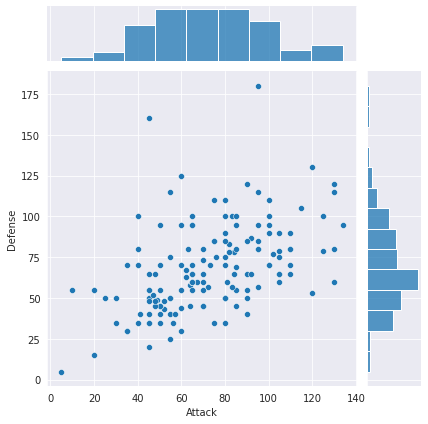

In [87]:
# combines scatter plot and histogram
sns.jointplot(x="Attack", y="Defense", data=df)

## Pair Plot

In [94]:
# same as pandas scatter plot
sns.pairplot(data=df[["HP", "Attack", "Defense"]])

## References

* [seaborn plots](https://elitedatascience.com/python-seaborn-tutorial)
* [seaborn plots for beginners kaggle](https://www.kaggle.com/kanncaa1/seaborn-tutorial-for-beginners)